In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np 
import seaborn as sns
import random
import math

In [ ]:
#df = pd.read_csv('drive/My Drive/NADJA/MALIN_NAD/kendaraan_train.csv')
df = pd.read_csv('https://drive.google.com/uc?id=1yfU7t0QRI6vFCx201j01gGTzrymJ932-')


df = df.drop('Kendaraan_Rusak', axis=1)
df = df.drop('Jenis_Kelamin', axis=1)
df = df.drop('Umur_Kendaraan', axis=1)
#df = df.drop('Tertarik', axis=1)

df

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,30.0,1.0,33.0,1.0,28029.0,152.0,97.0,0
1,2,48.0,1.0,39.0,0.0,25800.0,29.0,158.0,0
2,3,21.0,1.0,46.0,1.0,32733.0,160.0,119.0,0
3,4,58.0,1.0,48.0,0.0,2630.0,124.0,63.0,0
4,5,50.0,1.0,35.0,0.0,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...
285826,285827,23.0,1.0,4.0,1.0,25988.0,152.0,217.0,0
285827,285828,21.0,1.0,46.0,1.0,44686.0,152.0,50.0,0
285828,285829,23.0,1.0,50.0,1.0,49751.0,152.0,226.0,0
285829,285830,68.0,1.0,7.0,1.0,30503.0,124.0,270.0,0


# Data Exploration

In [ ]:
print("Data size before preprocessing: ",len(df))
print("Empty Datas :")
df.isnull().sum()

Data size before preprocessing:  285831
Empty Datas :


id                       0
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [ ]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum())) #menampilkan jumlah baris yang duplikat

Number of duplicate rows = 0


In [ ]:
df.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Umur               271617 non-null  float64
 2   SIM                271427 non-null  float64
 3   Kode_Daerah        271525 non-null  float64
 4   Sudah_Asuransi     271602 non-null  float64
 5   Premi              271262 non-null  float64
 6   Kanal_Penjualan    271532 non-null  float64
 7   Lama_Berlangganan  271839 non-null  float64
 8   Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 19.6 MB


In [ ]:
df.corr()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
id,1.000000,0.001729,-0.002658,0.002114,-0.003043,0.002292,-0.001500,0.000913,0.000972
Umur,0.001729,1.000000,-0.079467,0.043603,-0.255006,0.064634,-0.577722,0.000147,0.109888
SIM,-0.002658,-0.079467,1.000000,-0.003359,0.016073,-0.011315,0.043426,-0.001266,0.009588
Kode_Daerah,0.002114,0.043603,-0.003359,1.000000,-0.024533,-0.011887,-0.043216,-0.003639,0.010186
Sudah_Asuransi,-0.003043,-0.255006,0.016073,-0.024533,1.000000,0.005903,0.221767,0.002757,-0.340917
Premi,0.002292,0.064634,-0.011315,-0.011887,0.005903,1.000000,-0.112187,-0.000750,0.023770
Kanal_Penjualan,-0.001500,-0.577722,0.043426,-0.043216,0.221767,-0.112187,1.000000,0.000327,-0.140931
Lama_Berlangganan,0.000913,0.000147,-0.001266,-0.003639,0.002757,-0.000750,0.000327,1.000000,-0.002225
Tertarik,0.000972,0.109888,0.009588,0.010186,-0.340917,0.023770,-0.140931,-0.002225,1.000000


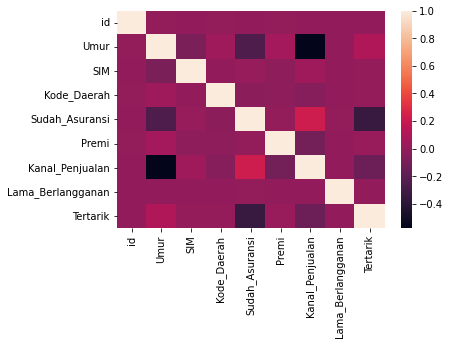

In [ ]:
sns.heatmap(df.corr())

# Pre-Processing

In [ ]:
def toNumeric(df) :
  tmp = df.copy()
  listcol = list(tmp.columns)
  datatypecol = dict(tmp.dtypes)
  variasi = []
  for x in listcol:
    if datatypecol.get(x) == "object" :
      variasi.append((x,list(df.groupby(x).groups.keys())))
  for x in variasi:
    #tmp[x[0]] = tmp[x[0]].replace([])
    for i in x[1] :
      idx = x[1].index(i)
      tmp[x[0]] = tmp[x[0]].replace([i],idx)

  return tmp

numerick = toNumeric(df)
numerick.head()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,30.0,1.0,33.0,1.0,28029.0,152.0,97.0,0
1,2,48.0,1.0,39.0,0.0,25800.0,29.0,158.0,0
2,3,21.0,1.0,46.0,1.0,32733.0,160.0,119.0,0
3,4,58.0,1.0,48.0,0.0,2630.0,124.0,63.0,0
4,5,50.0,1.0,35.0,0.0,34857.0,88.0,194.0,0


In [ ]:
def DoNotDropList(df):
  dropnanlist = []
  datatypecol = dict(df.dtypes)
  listcol = list(df.columns)
  for x in listcol:
    ngroup = df.groupby(x).ngroups
    if ngroup > 5:
      dropnanlist.append(x)
  return dropnanlist
  
nodrop = DoNotDropList(numerick) 
print(nodrop)

['id', 'Umur', 'Kode_Daerah', 'Premi', 'Kanal_Penjualan', 'Lama_Berlangganan']


In [ ]:
def FillNanSkew(df):
  dndlist = DoNotDropList(df)
  skew = df[dndlist].skew(axis=0, skipna=True)
  #skewness > 2 or < -2 = median
  #else mean
  for i in range(len(skew)):
    if skew[i] > -2 and skew[i] < 2 :
      df[dndlist[i]].fillna(df[dndlist[i]].mean(),inplace=True)
    else:
      df[dndlist[i]].fillna(df[dndlist[i]].median(),inplace=True)
  return df

In [ ]:
def DropNan(df):
  droplist = []
  datatypecol = dict(df.dtypes)
  listcol = list(df.columns)
  for x in listcol:
    ngroup = df.groupby(x).ngroups
    if ngroup <= 5:
      df = df[df[x].notna()]
  return df

print(DropNan(numerick))  

            id  Umur  SIM  ...  Kanal_Penjualan  Lama_Berlangganan  Tertarik
0            1  30.0  1.0  ...            152.0               97.0         0
1            2  48.0  1.0  ...             29.0              158.0         0
2            3  21.0  1.0  ...            160.0              119.0         0
3            4  58.0  1.0  ...            124.0               63.0         0
4            5  50.0  1.0  ...             88.0              194.0         0
...        ...   ...  ...  ...              ...                ...       ...
285826  285827  23.0  1.0  ...            152.0              217.0         0
285827  285828  21.0  1.0  ...            152.0               50.0         0
285828  285829  23.0  1.0  ...            152.0              226.0         0
285829  285830  68.0  1.0  ...            124.0              270.0         0
285830  285831  45.0  1.0  ...             26.0               44.0         0

[257920 rows x 9 columns]


In [ ]:
def MinMaxScalar(df):
  return (df - df.min()) / (df.max() - df.min())

MinMaxScalar(numerick)

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.000000,0.153846,1.0,0.634615,1.0,0.047251,0.932099,0.301038,0.0
1,0.000003,0.430769,1.0,0.750000,0.0,0.043104,0.172840,0.512111,0.0
2,0.000007,0.015385,1.0,0.884615,1.0,0.056002,0.981481,0.377163,0.0
3,0.000010,0.584615,1.0,0.923077,0.0,0.000000,0.759259,0.183391,0.0
4,0.000014,0.461538,1.0,0.673077,0.0,0.059953,0.537037,0.636678,0.0
...,...,...,...,...,...,...,...,...,...
285826,0.999986,0.046154,1.0,0.076923,1.0,0.043454,0.932099,0.716263,0.0
285827,0.999990,0.015385,1.0,0.884615,1.0,0.078239,0.932099,0.138408,0.0
285828,0.999993,0.046154,1.0,0.961538,1.0,0.087661,0.932099,0.747405,0.0
285829,0.999997,0.738462,1.0,0.134615,1.0,0.051853,0.759259,0.899654,0.0


In [ ]:
def PreProcessing(df,dtype=int,minmax=True):
  
  try:
    df = df.drop(columns=['id']) #drop the id column
  except:
    df = df
  df = toNumeric(df)        #changing enum value to their index
  df = FillNanSkew(df)      #Fill the NaN values
  df = DropNan(df)          #Drop the row if the data was enum
  df = df.astype(dtype)
  if minmax:
    df = MinMaxScalar(df)
  df = df.drop_duplicates() #drop duplicate values
  return df

prep = PreProcessing(df)
print("Data size before preprocessing: ",len(df))
print("Empty Datas :")
print(df.isnull().sum())
print(prep.info())
prep.describe()

Data size before preprocessing:  285831
Empty Datas :
id                       0
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 257236 entries, 0 to 285830
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur               257236 non-null  float64
 1   SIM                257236 non-null  float64
 2   Kode_Daerah        257236 non-null  float64
 3   Sudah_Asuransi     257236 non-null  float64
 4   Premi              257236 non-null  float64
 5   Kanal_Penjualan    257236 non-null  float64
 6   Lama_Berlangganan  257236 non-null  float64
 7   Tertarik           257236 non-null  float64
dtypes: float64(8)
memory usage: 17.7 MB
None


,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,257236.000000,257236.000000,257236.000000,257236.000000,257236.000000,257236.000000,257236.000000,257236.000000
mean,0.289360,0.997862,0.507356,0.458680,0.051997,0.685332,0.499311,0.122335
std,0.232876,0.046190,0.248352,0.498291,0.031033,0.326078,0.282697,0.327673
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.076923,1.000000,0.288462,0.000000,0.041565,0.333333,0.259516,0.000000
50%,0.276923,1.000000,0.538462,0.000000,0.052730,0.759259,0.498270,0.000000
75%,0.446154,1.000000,0.673077,1.000000,0.067417,0.932099,0.737024,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Remove Duplicate

In [ ]:
prep = prep.drop_duplicates() #drop data yang duplikat
prep.describe()

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,257236.000000,257236.000000,257236.000000,257236.000000,257236.000000,257236.000000,257236.000000,257236.000000
mean,0.289360,0.997862,0.507356,0.458680,0.051997,0.685332,0.499311,0.122335
std,0.232876,0.046190,0.248352,0.498291,0.031033,0.326078,0.282697,0.327673
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.076923,1.000000,0.288462,0.000000,0.041565,0.333333,0.259516,0.000000
50%,0.276923,1.000000,0.538462,0.000000,0.052730,0.759259,0.498270,0.000000
75%,0.446154,1.000000,0.673077,1.000000,0.067417,0.932099,0.737024,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#df.to_csv('cluster_kendaraan.csv')
#untuk download data yang telah diolah

# INPUT OUTPUT

In [ ]:
# split data train dan test
from  sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(prep, test_size=0.33)

In [ ]:
def SplitXY(prep,label):
  target = prep[[label]]
  return prep.drop(columns=[label]), target


In [ ]:
train_in,train_out = SplitXY(X_train,"Tertarik")

In [ ]:
train_in

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan
242563,0.569231,1.0,0.288462,1.0,0.000000,0.932099,0.546713
275325,0.092308,1.0,0.519231,1.0,0.044914,0.932099,0.768166
254764,0.092308,1.0,0.211538,1.0,0.000000,0.925926,0.536332
184703,0.000000,1.0,0.500000,1.0,0.064762,0.981481,0.273356
251000,0.061538,1.0,0.826923,1.0,0.049176,0.932099,0.086505
...,...,...,...,...,...,...,...
85041,0.138462,1.0,0.211538,1.0,0.053059,0.932099,0.494810
214965,0.446154,1.0,0.884615,1.0,0.043683,0.154321,0.626298
163035,0.415385,1.0,0.538462,0.0,0.051915,0.759259,0.110727
59864,0.276923,1.0,0.346154,0.0,0.045945,0.759259,0.743945


In [ ]:
train_out

,Tertarik
242563,0.0
275325,0.0
254764,0.0
184703,0.0
251000,0.0
...,...
85041,0.0
214965,0.0
163035,0.0
59864,1.0


In [ ]:
test_in, test_out = SplitXY(X_test,"Tertarik")

In [ ]:
def dfTargetToArray(df,label_target=None):
  if label_target != None:
    arr_x, arr_y = SplitXY(df,label_target)
    arr_y = arr_y.transpose()
    return arr_x.to_numpy(), arr_y.to_numpy()[0]
  else: return df.to_numpy()

In [ ]:
train, train_target = dfTargetToArray(df,'Tertarik')

# Pemodelan

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#Decision Tree
cls = DecisionTreeClassifier(criterion="entropy")
cls.fit(train_in,train_out)

predict_target = cls.predict(test_in)

### Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
cls = GaussianNB()
cls.fit(train,train_target)

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
cls = LinearRegression()
cls.fit(train,train_target)

In [ ]:
predict_target = cls.predict(train)
predict_target

# Evaluasi

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(test_out,predict_target)

print('Classification Report Naive Bayes')
print(classification_report(test_out,predict_target))
cm

Classification Report Naive Bayes
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90     74547
         1.0       0.28      0.29      0.28     10341

    accuracy                           0.82     84888
   macro avg       0.59      0.59      0.59     84888
weighted avg       0.82      0.82      0.82     84888



array([[66829,  7718],
       [ 7367,  2974]])

In [ ]:
#percentage
(cm/np.sum(cm))*100

array([[78.72608614,  9.09198002],
       [ 8.67849402,  3.50343983]])

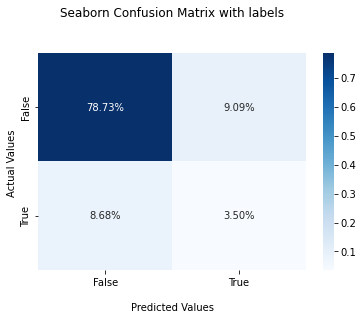

In [ ]:
ax = sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True']) #bisa positive negative
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]

print("True Negative  :" , TN) 
print("False Negative :" , FN)
print("True Positive  :" , TP)
print("False Positive :" , FP)

True Negative  : 66829
False Negative : 7367
True Positive  : 2974
False Positive : 7718


In [ ]:
from sklearn import metrics
TPR = metrics.recall_score(test_out,predict_target)
ACC = metrics.accuracy_score(test_out,predict_target)
F1S = metrics.f1_score(test_out,predict_target)
PCR = metrics.precision_score(test_out,predict_target)
JAC = metrics.jaccard_score(test_out,predict_target)

In [ ]:
#print("False Positive Rate  :" , FPR)
#print("False Negative Rate  :" , FNR)
#print("True Negative Rate   :" , TNR)
print("True Positive Rate   :" , TPR)
print("Accuracy             :", ACC)
print("Precision            :", PCR)
print("F1 Score             :", F1S)
print("Jaccard Score        :", JAC)

True Positive Rate   : 0.28759307610482543
Accuracy  : 0.8222952596362265
Precision : 0.2781518892630004
F1 Score  : 0.28279370513003377
Jaccard Score  : 0.16468242981338946
